# Artificial Neural Networks (ANN)



## Neural networks

### Perceptron
Neural network consists of few layers of perceptrons. Each perceptron simulates the operation of neuron. It collects input variables $x_i$, weights them with coefficients $w_i$, and sums the result to one value. The output value is obtained by scaling the sum between values 0...1 by using an activation function. For classification, the activation function is binary step function, and for regression, it is continuous, like sigmoid function. The neuron can be teached by updating the weights $w_i$.

![Perceptron](kuvat/perceptron.svg)

The output of the perceptron is

$$
  y = f\left(\mathbf{x} \cdot \mathbf{w} + b\right) 
  = f\left( \Sigma_{i=1}^{n} (x_i w_i) + b \right)
$$

### Activation functions

Common activation functions, $f()$, are 
 1. Linear
 1. Sigmoid
 1. Hyperbolic tangent (tanh())
 1. REctified Linear activation fUnction (RELU)
 
Percepton networks using linear activation function are easy to train, but they cannot solve as complex problems as networks using non-linear activation functions. Sigmoid, also known as logistic function, was originally the default activation function, but it was replaced with hyperbolic tangent which seemed to be easier to train and performing better. 
 
A problem with both sigmoid and hyperbolic tangent is, however, that they saturate to constant output when the input is large or small, which leads to derivative approaching to zero which slows down the training.

ReLu is simple activation function which supports fast learning due to being mostly linear and allows learning complex problems being piecewise non-linear. ReLu is especially usefull when training deep neural networks.
 
Read more about activation function from [RELU for deep learning NN](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/).

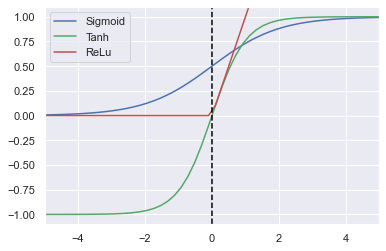

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sigmoid = lambda x: 1/(1+np.exp(-x))
tanh = np.tanh
relu = lambda x: [max(0,y) for y in x]
x=np.linspace(-5,5)

plt.plot(x, sigmoid(x), color='b', label='Sigmoid')
plt.plot(x, tanh(x), color='g', label='Tanh')
plt.plot(x, relu(x), color='r', label='ReLu')
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.axis([-5,5,-1.1,1.1])
plt.savefig('activation_functions.svg')

In [11]:
def perceptron(X,W,activation='relu'):
    if activation == 'tanh':
        f=np.tanh
    elif activation == 'sigmoid':
        f=lambda x: 1.0/(1+np.exp(-x))
    else:
        if activation != 'relu':
            print("Unknown activation function, using ReLu")
        f=lambda x: max(0,x)
    return f(W[0] + sum(X*W[1:]))

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

W=np.array([-1.0,1.0])
N=100
x=np.linspace(-6,6,N)
y=np.zeros(N)

def test(w0=0.0, w1=1.0, activation='sigmoid'):
    global W,x
    W[:] = (w0,w1)
    y=[perceptron(xx, W, activation) for xx in x]
    plt.figure()
    plt.plot(x,y)
    plt.axvline(0, linestyle='--')
    

interact(test, w0=(-3.0,3.0),w1=(-1.0,1.0), activation=['sigmoid', 'tanh', 'relu'])

interactive(children=(FloatSlider(value=0.0, description='w0', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

<function __main__.test(w0=0.0, w1=1.0, activation='sigmoid')>

### Learning algorithms

When using Stochastic Gradient Decent (**SGD**) training,  the weights, $w_i$, are updated towards the gradient (multidimensional derivative) or the loss function. 
$$
    w \leftarrow w - \eta \left(\alpha \frac{\partial R(w)}{\partial w} + \frac{\partial L(w)}{\partial w}\right),
$$

where $\eta$ is the learning rate, $\alpha$ is the regularization term (L2 penalty for exessive model complexity), $R$ is a function related to model complexity and $L$ is a loss function. The weights of the model are simply updated to the direction where the model loss is reduced and model complexity is reduced. 

**Adams** is slightly more advanced and can optimize the parameters of the search, and find optimum faster. Another common learning method is **L-BFGS** (Limited memory, Broyden-Fletcher-Goldfarb-Shannon). It is also using the second derivatives of the search space and is thus faster, when the derivatives and memory resources are available. 

### Multi layer perceptron

A single perceptron can only handle simple problems. For more complex problems, a network of several layers of perceptrons are needed. These networks are called as Multi Layer Perceptron networks (MLP) or artificial neural networks (ANN). When the number of hidden layer is large, the network is called as Deep Neural Network (DNN) and it is one example of Deep Learning.

![Perceptron](kuvat/mlp.svg)


Try to train multi layer neural network models in [Neural Network Playground](https://playground.tensorflow.org/).

The above Iris example can be classified using Multi Layer Perceptron Classifier (MLPC) but SVM already handled that problem well and because the number of samples in the dataset is only 150, it is only sufficient for training very thin MLPC. Therefore, lets create an artificial classification problem with 1000 samples and tree partly overlapping classes to make the problem more challengin and train an MLPC for solving it. 

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score
from snippets import plotDB

[[304  23   8]
 [ 11 320   4]
 [  3  14 313]]
Prediction accuracy is 0.937


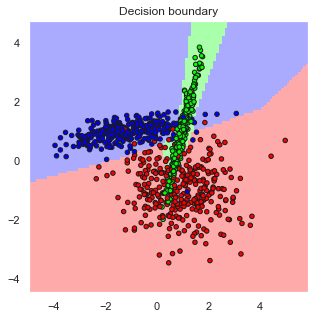

In [14]:
# Make a random 3-class classification problem, with 1000 samples and 2 features
X,y=data=datasets.make_classification(n_samples=1000, n_features=2, n_classes=3, random_state=2,
                                  n_clusters_per_class=1, n_informative=2, n_redundant=0)

# Create a multilayer perceptron classifier with 10 and 6 perceptrons in hidden layer
predictor = MLPClassifier(hidden_layer_sizes=(10,6), max_iter=1000)
predictor.fit(X=X, y=y)
classes = predictor.predict(X)

# Assess the accuracy of the classifier
accuracy = accuracy_score(y_true=y, y_pred=classes)
M=confusion_matrix(y, classes)

# Plot the results and decision boundaries
print(M)
print("Prediction accuracy is", accuracy)
plotDB(predictor, X=X, y=y, figsize=(5,5))


## Digits dataset

In [20]:
digits = datasets.load_digits()
X=digits.data
y=digits.target

predictor = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000)
predictor.fit(X=X, y=y)

classes = predictor.predict(X)

In [21]:
print("Prediction accuracy is", accuracy)

# Assess the accuracy of the classifier
accuracy = accuracy_score(y_true=y, y_pred=classes)
cvscore = cross_val_score(predictor, X, y).mean()
M=confusion_matrix(y, classes)

# Plot the results and decision boundaries
print(M)
print("Prediction accuracy is   ", accuracy)
print("Prediction accuracy in CV", cvscore)

Prediction accuracy is 0.937


/home/petri/.conda/envs/Test/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]
Prediction accuracy is    1.0
Prediction accuracy in CV 0.8992850510677808


## Keras and Pytorch

MLP classifier and regressors use only CPU resources, but to utilize real power of ANN, they are often ran in massive parallel hardware, such as GPU:s. This is not necessary for simple neural network models shown above, but they become more important when the number of hidden layers in the network model increases and the model becomes deeper. 

Frameworks often used for Deep Neural Networks are for example Keras and Pytorch. 

[Keras examples](https://keras.io/examples/)

[Keras vs Pytorch for Deep Learning](https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d)

[PyTorch vs Keras](https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d)

## Pre trained models

Since the training of the neural network models is so time consuming, an important topics in deep learning are pre trained models and transfer learning (the model trained to one application is used in another related application without retraining, or partial re-training.

Some huge deep networks can be also used as general purpose neural networks. One of the biggest network this far is the Generative Pre-trained Transformer 3 ([GPT-3](https://en.wikipedia.org/wiki/GPT-3)), which is suitable for many Natural Language Processing (NLP) tasks. GPT-3 sisältää 175 billion ($175 \cdot 10^9$) parameters. GPT-3 can generate text wich is difficult to distinguish from a human writer.

[A robot wrote this entire article. Are you scared yet, human](https://www.theguardian.com/commentisfree/2020/sep/08/robot-wrote-this-article-gpt-3)

## Summary


-